In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from tensorflow.keras.utils import timeseries_dataset_from_array
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

## Deep Learning with Python
Chollet François

<b>[1. Deep Learning Fundamentals](#1)<br></b>
    1.1 Neural Network Composition<br>
    1.2 Gradient Descent<br>
    1.3 Activation Functions<br>
    1.4 Real world examples of data tensors (inputs expected by NN models)<br>
    1.5 Common-Sense Baseline<br>

<b>[2. Improving the Model](#2)<br></b>
    2.1 Improving model fit<br>
    2.2 Improving Generalization<br>
    3.3 Dropout<br>

<b>[3. Regularization](#3)<br></b>
    3.1 Reducing the network's size<br>
    3.2 Adding Weights Regularization<br>

<b>[4. Deep Learning for Classification ](#4)<br></b>
    4.1 Binary Classification<br>
    4.2 Multi-class Classification<br>

<b>[5. Deep Learning for Regression](#5)<br></b>

<b>[6. Deep Learning for Timeseries](#6)<br></b>
    6.1 Train, Val, Test Datasets using Sliding Windows<br>
    6.2 Evaluating a Base Naive Model<br>
    6.3 Evaluating a Basic Machine Learning Model<br>
    6.4 Evaluating a 1D Convolutional Model<br>
    6.5 Evaluating a Basic LSTM based model<br>

<b>[7. Recursive Neural Networks](#7)<br></b>
    7.1 Simple RNN<br>
    7.2 Recurrent Dropout<br>
    7.3 Stacking RNNS<br>
    7.4 Bidirectional RNNs<br>
    7.5 Better improve the model<br>

### ⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷
### <a id =1> 1. Deep Learning Fundamentals </a>

#### 1.1 Neural Network Composition

The model, composed of layers that are chained together, maps the input data to predictions. The loss function then compares these predictions to the targets, producing a loss value: a measure of how well the model’s predictions match what was expected. The optimizer uses this loss value to update the model’s weights.

<img src='network.PNG' height=550 width=350>.

- optimizer: the mechanism through which the model will update itself based on the training data it sees, so as to improve its performance. Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD). <i>rmsprop</i> is a usually a good default choice for virtually any problem.<br><br>
    
- loss function: how the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.<br><br>

- metrics: The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.


#### 1.2 Gradient Descent
Gradient descent is done in mini-batches of samples (typically between 8 and 128) that are processed simultaneously by the model. The number of samples is
often a power of 2, to facilitate memory allocation on GPU.

#### 1.3 Activation Functions
Without an activation function like relu (also called a non-linearity), the Dense(units=n) layer would consist of two linear operations—a dot product and an addition: output = dot(input,W)+b

The layer could only learn linear transformations (affine transformations) of the input data: the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a n-dimensional space. Such a hypothesis space is too restricted and wouldn’t benefit from multiple layers of representations, because a deep stack of linear layers would still implement a linear operation.

In order to get access to a much richer hypothesis space that will benefit from deeprepresentations, you need a non-linearity, or activation function.  relu is the most popular activation function in deep learning.

#### 1.4 Real world examples of data tensors (inputs expected by NN models)

- Vector data—Rank-2 tensors of shape (samples, features), where each sample is a vector of numerical attributes (“features”)


- Timeseries data or sequence data—Rank-3 tensors of shape (samples, timesteps, features), where each sample is a sequence (of length timesteps) of feature　vectors

Ex: <i>A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus, every minute is encoded as a 3D vector, an entire day of trading is encoded as a matrix of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a rank-3 tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.</i>

- Images—Rank-4 tensors of shape (samples, height, width, channels), where each sample is a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”=1 for Gray 3 for RGB)


- Video—Rank-5 tensors of shape (samples, frames, height, width, channels), where each sample is a sequence (of length frames) of images

#### 1.5 Common-Sense Baseline
Always have a naive model as a baseline to compare other models with!!! It can be a random classifier or any simple non-machine learning technic

### ⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷
### <a id=2> 2. Improving the Model </a>

#### 2.1 Improving model fit

To achieve the perfect fit, you must first overfit. Since you don’t know in advance where the boundary lies, you must cross it to find it. Once we find a model that overfits we take measures to fight overfitting.

<u>Common problem 1</u>

    training doesn't get started: training loss doesn't go down over time

<u>Solutions</u>

Even if nothing about your problem makes sense, you should still be able to train something—if only by memorizing the training data. When this happens, it’s always a problem with the configuration of the gradient descent process: 

- choice of optimizer
- the distribution of initial values in the weights of the model
- batch size
- learning rate (tweak inside the optimizer)

        model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])


All these parameters are interdependent, and as such it is usually sufficient to tune the learning rate and the batch size while keeping the rest of the parameters constant.

<u>Common problem 2</u>

    training started but the model doesn't perform well: you can't beat the common sense baseline

<u>Solutions</u>

This is perhaps the worst machine learning situation you can find yourself in. It indicates that something is fundamentally wrong with your approach, and it may not be easy to tell what. Here are some tips.

- input data doesn't contain enough information to predict the target
- model used is not suited for the problem at hand (Ex: Conv1D for time series): read up on architecture best practices for our kind of task

<u>Common problem 3</u>

    training and validation loss both go down over time, and we can beat the baseline but we can't overfit (validation loss stagnates, doesn't increase after a certain number of epochs), which indicates we're still underfitting.

<u>Solutions</u>

If we can't overfit, it’s likely a problem with the representational power of our model: we need a model with more capacity, by

- adding more layers
- using more units per layer

#### 2.2 Improving Generalization

Once your model has shown itself to have some generalization power and to be able to overfit, it’s time to switch your focus to maximizing generalization.

1. Data Data Data

If your data makes it possible to smoothly interpolate between samples, you will be able to train a deep learning model that generalizes. If your problem is overly noisy or fundamentally discrete, like, say, list sorting, deep learning will not help you. Deep learning is curve fitting, not magic.

- having enough data
- visualize data and check for anomalies
- clean data and deal with missing values
- feature selection 

2. Feature engineering/Feature selection

The essence of feature engineering: making a problem easier by expressing it in a simpler way. Make the latent manifold smoother, simpler, better organized. Doing so usually requires understanding the problem in depth.

3. Early Stopping

Finding the exact point during training where you’ve reached the most generalizable fit—the exact boundary between an underfit curve and an overfit curve—

4. Regularization

### ⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷
### <a id=3> 3. Regularization </a>

“regularizing” the model: making the model simpler, more “regular,” its curve smoother, more “generic”; thus it is less specific to the training set and better able to generalize by more closely approximating the latent manifold of the data.

#### 3.1 Reducing the network's size

The general workflow for finding an appropriate model size is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss.

#### 3.2 Adding Weights Regularization

A common way to mitigate overfitting is to put constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more regular and have less entropy. 

This is done by adding to the loss function of the model a cost associated with having large weights.

- <i>L1 regularization</i>: The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights)

- <i>L2 regularization/Weight decay</i>: The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights)

regularizers.l2(0.002) means that every coefficient in the weight matrix of the layer will add 0.002 * weight_coefficient_value ** 2 to the total loss of the model. Note that because this penalty is only added at training time, the loss for the model will be much higher at training than at test time.

In [5]:
from tensorflow.keras import regularizers

In [ ]:
regularizers.l1(0.001)  #l1 regularization
regularizers.l2(0.001)  #l2 regularization
regularizers.l1_l2(l1=0.001, l2=0.001) #simultaneous l1 & l2 regularization

model = Sequential([Dense(16,kernel_regularizer=regularizers.l2(0.002),activation="relu"),
                    Dense(16,kernel_regularizer=regularizers.l2(0.002),activation="relu"),
                    Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

Note that weight regularization is more typically used for smaller deep learning models. Large deep learning models tend to be so overparameterized that imposing constraints on weight values hasn’t much impact on model capacity and generalization. In
these cases, a different regularization technique is preferred: dropout.

#### 3.3 Dropout
One of the most effective and most commonly used regularization techniques for neural networks. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate
is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5.

At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

You may sometimes be offered ethically dubious projects, such as “building an AI that rates the trustworthiness of someone from a picture of their face.” First of all,
the validity of the project is in doubt: it isn’t clear why trustworthiness would be
reflected on someone’s face. Second, such a task opens the door to all kinds of ethical problems.....You may sometimes be offered ethically dubious projects, such as “building an AI
that rates the trustworthiness of someone from a picture of their face.” First of all,
the validity of the project is in doubt: it isn’t clear why trustworthiness would be
reflected on someone’s face. Second, such a task opens the door to all kinds of ethical problems. 

### ⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷
### <a id=4> 4. Deep Learning for Classification </a>


- Two-class Classification: 
> - activation: <i>sigmoid</i>
> - loss: <i>binary_crossentropy</i>

- Multi-Class Single-Label Classification: 
> - activation: <i>softmax</i> (the model will output a probability distribution over the k number of classes)
> - loss: <i>categorical_crossentropy</i>

<i>categorical_crossentropy</i>, expects the labels to follow a categorical encoding. With integer encoding, you should use <i>sparse_categorical_crossentropy</i>


Mean_squared_error can be used as a loss as well, but crossentropy is the best choice when dealing with models that output probabilities. Crossentropy is a quantity from the field of information theory that measures the distance between probability distributions of y_true and y_pred
    
    
- Multi-Class Multi-label Classification: 

Multilabel can be binary or multiclass, it's when items can be classified as more than 1 class.

> - activation: <i>sigmoid</i>
> - loss: <i>binary_crossentropy</i>
    
- Metric choice

Balanced classification problems, where every class is equally likely:
        
    - Accuracy
    - ROC curve

Unbalanced problems, ranking problems or multilabel classification:

    - Precision
    - Recall
    - Weighted form of accuracy or ROC
   
    
#### 4.1 Binary Classification

In [ ]:
model = Sequential([Dense(16, activation="relu"),
                    Dense(16, activation="relu"),
                    Dense(1, activation="sigmoid")]) #should end with sigmoid activation
    
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",  #!!!loss for binary classification
              metrics=["accuracy"])

#!! monitor for the overfitting by checking model.history.history
#!! retrain the model using less epochs if overfitting happens
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

#retrain the model on the entire x_train

model.evaluate(x_test,y_test) #show the loss and metrics as measured on the test set
model.predict(x_test) #generate the actual predictions

#### 4.2 Multi-class Classification

Example of 42 classes: 

In the previous example, we used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information. For this reason we’ll use larger layers. Let’s go with 64 units.

In [ ]:
model = Sequential([Dense(64, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(46, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### ⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷
### <a id=5> 5. Deep Learning for Regression</a>
- activation: none for the last layer, because we want the actual value not the probability
- loss: <i>mse</i> (we can't use mae because it's not differentiable ==> we can't calculate its gradient)
- metric: <i>mae</i>


- When there is little data available: using K-fold validation
- When little training data is available, it’s preferable to use a small model with few intermediate layers (typically only one or two), in order to avoid severe overfitting.

In [ ]:
def build_model():
    model = Sequential([Dense(64, activation="relu"),
                        Dense(64, activation="relu"),
                        Dense(1)]) #scalar prediction

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
#Manual k-fold validation: in case if our data is small
k = 10
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('Processing fold #',i)
    start = i * num_val_samples
    end = (i+1) * num_val_samples
    
    X_val = X_train[start:end]
    y_val = y_train[start:end]
    
    X_train_partial = np.concatenate([X_train[:start],X_train[end:]],axis=0)
    y_train_partial = np.concatenate([y_train[:start],y_train[end:]],axis=0)
    
    model = build_model()
    model.fit(X_train_partial,y_train_partial,epochs=num_epochs,batch_size=16,verbose=0)
    
    val_mse, val_mae = model.evaluate(X_val,y_val,verbose=0)
    all_scores.apppend(val_mae)

np.mean(all_scores)

In [ ]:
#Manual k-fold validation Increasing the number of epochs, while recording the mae scores
k = 10
num_val_samples = len(X_train) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('Processing fold #',i)
    start = i * num_val_samples
    end = (i+1) * num_val_samples
    
    X_val = X_train[start:end]
    y_val = y_train[start:end]
    
    X_train_partial = np.concatenate([X_train[:start],X_train[end:]],axis=0)
    y_train_partial = np.concatenate([y_train[:start],y_train[end:]],axis=0)
    
    model = build_model()
    model.fit(X_train_partial,y_train_partial,
              validation_data=(X_val,y_val),
              epochs=num_epochs,batch_size=16,verbose=0)
    
    mae_history = model.history.history['val_mae']
    all_mae_histories.append(mae_history)
    
#average mae for each epoch:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#!!!Plot and choose the num of epochs where the validation MAE stops improving <==> start of overfitting
plt.plot(range(1,num_epochs+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE');

### ⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷
### <a id=6> 6. Deep Learning for Timeseries

In [3]:
temp_df = pd.read_csv('jena_climate_2009_2016.csv',parse_dates=True)

In [4]:
temp_df.head(2)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1


In [5]:
temp = temp_df['T (degC)']
raw = temp_df.iloc[:,1:].to_numpy()
raw = temp_df.iloc[:,1:]

In [6]:
train_length = int(0.5*len(temp))
val_length = int(0.25*len(temp))
test_length = len(temp) - train_length - val_length

In [7]:
#normalizing
mean = raw[:train_length].mean(axis=0)
raw -= mean

std = raw[:train_length].std(axis=0)
raw /= std

In [8]:
raw.shape

(420451, 14)

#### 6.1 Train, Val, Test Datasets using Sliding Windows
We use the keras generator timeseries_dataset_from_array() so as not to allocate memory for every sample.

In [10]:
#Usage example
a = np.arange(10)
data = timeseries_dataset_from_array(data=a[:-3],
                                    targets=a[3:],
                                    sequence_length=3,
                                    batch_size=2)

for X, y in data: #it yields a tuple (features,target)
    for i in range(X.shape[0]):
        print([int(x) for x in X[i]], int(y[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [11]:
#Use on our Temp dataset
sampling_rate = 6  #observations will be sampled at one data point per hour:
                   #data is 10minutely so we will only keep one data point out of 6
sequence_length = 120 #120h = 5 days: use 5days data to predict 1 day?
delay = sampling_rate * (sequence_length + 24 - 1) #the target for a sequence will be the temp 24h after the end of the sequence
batch_size = 256

train = timeseries_dataset_from_array(data=raw[:-delay],
                                     targets=temp[delay:],
                                     sampling_rate=sampling_rate,
                                     sequence_length=sequence_length,
                                     shuffle=True,
                                     batch_size=batch_size,
                                     start_index=0,
                                     end_index=train_length)

val = timeseries_dataset_from_array(data=raw[:-delay],
                                   targets=temp[delay:],
                                   sampling_rate=sampling_rate,
                                   sequence_length=sequence_length,
                                   shuffle=True,
                                   batch_size=batch_size,
                                   start_index=train_length,
                                   end_index=train_length+val_length)

test = timeseries_dataset_from_array(data=raw[:-delay],
                                   targets=temp[delay:],
                                   sampling_rate=sampling_rate,
                                   sequence_length=sequence_length,
                                   shuffle=True,
                                   batch_size=batch_size,
                                   start_index=train_length+val_length)

#each dataset yields a tuple(sample,targets), where sample is a batch of 256 sammples, each containing 120 consecutive hours of input data
#targets is the corresponding array of 256 target temperatures
#samples are randomly shuffled, so 2 consecutive sequences in a batch (sample[0], sample[1]) aren't necessarily temprarily close.

In [12]:
for samples, targets in train:
    print('samples shape: ',samples.shape)
    print('targets shape: ',targets.shape)
    break

samples shape:  (256, 120, 14)
targets shape:  (256,)


In [13]:
i = 0
for samples, targets in train:
    i += 1
print(i)

819


#### 6.2 Evaluating a Base Naive Model

Naive model: the temperature timeseries can safely be assumed to be continuous (the temperatures tomorrow are likely to be close to the temperatures today) as well as periodical with a daily period. Thus a common-sense approach is to always predict that the temperature 24 hours from now will be equal to the temperature right now. 

In [25]:
def evaluate_naive_method(data):
    total_abs_err = 0
    samples_seen = 0
    for samples, targets in data:
        # : for all batches, -1: last day in sample = target - 24h, 1: for temperature
        preds = samples[:,-1,1] * std[1] + mean[1] #reverse the normalization
        total_abs_err += np.sum(np.abs(preds-targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen


print(f"Validation MAE: {evaluate_naive_method(val):.2f}")
print(f"Test MAE: {evaluate_naive_method(test):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


#### 6.3 Evaluating a Basic Machine Learning Model

It’s useful to try simple, cheap machine learning models (such as small, densely connected networks) before looking into complicated and computationally expensive models such as RNNs. This is the best way to make sure any further complexity you throw at the problem is legitimate and delivers real benefits.

We use a fully connected model that starts by flattening the data and then runs it through two Dense layers. <b>Note the lack of an activation function on the last Dense layer, which is typical for a regression problem.</b> We use mean squared error (MSE) as the loss, rather than MAE, because unlike MAE, it’s smooth around zero, which is a useful property for gradient descent. We will monitor MAE by adding it as a metric in compile()

This model does not outperform the naive model <b>test MAE = 2.66</b>, flattening the timeseries removes the notion of time from our data.

In [35]:
inputs = Input(shape=(sequence_length,raw.shape[-1])) #(timesteps,n_features)
x = Flatten()(inputs)
x = Dense(16,activation='relu')(x)

outputs = Dense(1)(x)
model = Model(inputs,outputs)

#we use a callback to save the best performing model
callbacks = [ModelCheckpoint('jena_dense.keras',save_best_only=True)]

model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
#validation data specifies the dataset on which the metrics will be monitored
history = model.fit(train,epochs=10,validation_data=val,callbacks=callbacks)

#reload the best model and evaluate it on the test data
model = keras.models.load_model('jena_dense.keras')

# evaluate() computes the metrics after the training
#can be used for validation dataset as well if it wasn't already specified in fit()
print(f"Test MAE: {model.evaluate(test)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 11s 13ms/step - loss: 12.2825 - mae: 2.7109 - val_loss: 10.9487 - val_mae: 2.6088
Epoch 2/10
819/819 [==============================] - 8s 10ms/step - loss: 8.9615 - mae: 2.3554 - val_loss: 10.8707 - val_mae: 2.6076
Epoch 3/10
819/819 [==============================] - 8s 10ms/step - loss: 8.2025 - mae: 2.2512 - val_loss: 10.4018 - val_mae: 2.5520
Epoch 4/10
819/819 [==============================] - 8s 10ms/step - loss: 7.7225 - mae: 2.1851 - val_loss: 10.6946 - val_mae: 2.5874
Epoch 5/10
819/819 [==============================] - 8s 10ms/step - loss: 7.4151 - mae: 2.1425 - val_loss: 10.4900 - val_mae: 2.5580
Epoch 6/10
819/819 [==============================] - 9s 11ms/step - loss: 7.1329 - mae: 2.1008 - val_loss: 10.8163 - val_mae: 2.5951
Epoch 7/10
819/819 [==============================] - 9s 11ms/step - loss: 6.9334 - mae: 2.0727 - val_loss: 10.9892 - val_mae: 2.6294
Epoch 8/10
819/819 [==============================] - 8s 10m

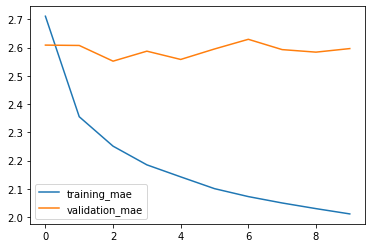

In [45]:
loss_df = pd.DataFrame({'training_mae': history.history['mae'],
                      'validation_mae':history.history['val_mae']})
loss_df.plot();

#### 6.4 Evaluating a 1D Convolutional Model
Just like the Conv2D, which sees the inputs through small windows that swipe across 2D grids. There are is also the Conv1D layer that relies on 1D windows that slide across input sequences.

Conv layers are a great fit for any sequence data that follows the <b>translation invariance assumption</b> (meaning that if you slide a window over the sequence, the content of the window should follow the same properties independently of the location of the window).

We’ll pick an initial window length of 24, so that we look at 24 hours of data at a time (one cycle). As we downsample the sequences (via MaxPooling1D layers), we’ll reduce the window size accordingly.

As it turns out, this model performs even worse than the densely connected one <b>test MAE = 3.2</b>. What went wrong here? Two things:
- Weather data doesn’t quite respect the translation invariance assumption. While the data does feature daily cycles, data from a morning follows different properties than data from an evening. Weather data is only translation-invariant for a very specific timescale.
- Order in our data matters—a lot. The recent past is far more informative for predicting the next day’s temperature than data from five days ago. A 1D convnet is not able to leverage this fact. In particular, our max pooling and global average pooling layers are largely destroying order information.


Mor about translation invariance:
https://towardsdatascience.com/neural-networks-intuitions-8-translation-invariance-in-object-detectors-21db6e27879c

In [52]:
inputs = Input(shape=(sequence_length,raw.shape[-1]))

x = Conv1D(8,24,activation='relu')(inputs)
x = MaxPooling1D(2)(x)
x = Conv1D(8,12,activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(8,6,activation='relu')(x)
x = GlobalAveragePooling1D()(x)

outputs = Dense(1)(x)
model = Model(inputs,outputs)

callbacks = [ModelCheckpoint('jena_conv.keras',save_best_only=True)]

model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history = model.fit(train,epochs=10,validation_data=val,callbacks=callbacks)

model = keras.models.load_model('jena_conv.keras')

print(f"Test MAE: {model.evaluate(test)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 23s 27ms/step - loss: 22.5322 - mae: 3.7240 - val_loss: 17.1753 - val_mae: 3.3054
Epoch 2/10
819/819 [==============================] - 22s 26ms/step - loss: 15.6811 - mae: 3.1453 - val_loss: 16.3735 - val_mae: 3.1828
Epoch 3/10
819/819 [==============================] - 22s 27ms/step - loss: 14.4774 - mae: 3.0189 - val_loss: 18.8050 - val_mae: 3.4210
Epoch 4/10
819/819 [==============================] - 22s 27ms/step - loss: 13.6206 - mae: 2.9241 - val_loss: 15.1170 - val_mae: 3.0608
Epoch 5/10
819/819 [==============================] - 22s 27ms/step - loss: 12.9291 - mae: 2.8465 - val_loss: 15.3507 - val_mae: 3.1098
Epoch 6/10
819/819 [==============================] - 22s 26ms/step - loss: 12.3556 - mae: 2.7816 - val_loss: 14.2744 - val_mae: 2.9991
Epoch 7/10
819/819 [==============================] - 22s 27ms/step - loss: 11.9043 - mae: 2.7317 - val_loss: 16.2372 - val_mae: 3.1748
Epoch 8/10
819/819 [============================

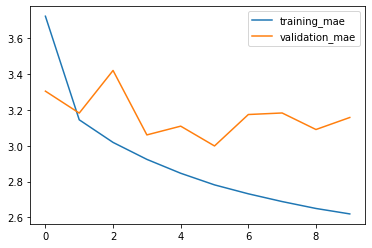

In [54]:
loss_df = pd.DataFrame({'training_mae': history.history['mae'],
                      'validation_mae':history.history['val_mae']})
loss_df.plot();

#### 6.5 Evaluating a Basic LSTM based model

This model performs a little better than the naive baseline mode <b>test MAE = 2.54</b>. We can further refine it.

In [73]:
inputs = Input(shape=(sequence_length,raw.shape[-1]))
x = LSTM(16)(inputs)
outputs = Dense(1)(x)
model = Model(inputs,outputs)

callbacks = [ModelCheckpoint('jena_lstm.keras',save_best_only=True)]

model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history = model.fit(train,epochs=10,validation_data=val,callbacks=callbacks)

model = keras.models.load_model('jena_lstm.keras')

print(f"Test MAE: {model.evaluate(test)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 55s 65ms/step - loss: 42.7639 - mae: 4.7577 - val_loss: 12.5378 - val_mae: 2.6879
Epoch 2/10
819/819 [==============================] - 55s 67ms/step - loss: 11.0134 - mae: 2.5754 - val_loss: 9.4333 - val_mae: 2.3855
Epoch 3/10
819/819 [==============================] - 59s 72ms/step - loss: 9.6612 - mae: 2.4226 - val_loss: 9.2221 - val_mae: 2.3671
Epoch 4/10
819/819 [==============================] - 58s 71ms/step - loss: 9.1418 - mae: 2.3556 - val_loss: 9.6099 - val_mae: 2.4055
Epoch 5/10
819/819 [==============================] - 57s 70ms/step - loss: 8.6806 - mae: 2.2970 - val_loss: 9.1129 - val_mae: 2.3520
Epoch 6/10
819/819 [==============================] - 57s 69ms/step - loss: 8.3340 - mae: 2.2534 - val_loss: 9.1942 - val_mae: 2.3603
Epoch 7/10
819/819 [==============================] - 59s 72ms/step - loss: 8.1354 - mae: 2.2280 - val_loss: 9.3232 - val_mae: 2.3789
Epoch 8/10
819/819 [==============================] - 59s 7

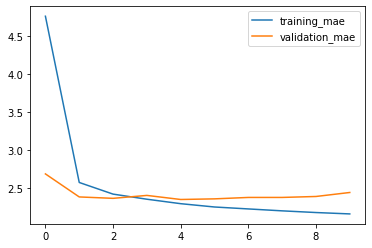

In [74]:
loss_df = pd.DataFrame({'training_mae': history.history['mae'],
                      'validation_mae':history.history['val_mae']})
loss_df.plot();

### ⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷⊷
### <a id=7> 7. Recursive Neural Networks</a>

#### 7.1 Simple RNN

* <u>Numpy Implementation</u>

This process corresponds to Keras's SimpleRNN layer. There is one minor difference: SimpleRNN processes batches of sequences, like all other Keras layers, not a single sequence as in this NumPy example. This means it takes inputs of shape (batch_size, timesteps, input_features), rather than (timesteps,input_features).

In [59]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps,input_features)) #(100,32)
state_t = np.zeros((output_features,)) #initial state: all zeros vector

#create random weight matrices
W = np.random.random((output_features,input_features)) #(64,32)
U = np.random.random((output_features,output_features)) #(64,64)
b = np.random.random((output_features,)) #(64,)

successive_outputs = []
for input_t in inputs: #input_t.shape = (input_features,)
    output_t = np.tanh(np.dot(W,input_t) + np.dot(U,state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t #update the state of the network for the next timestep
    #actually we don't need the entire output sequence, we only need this last output_t cuz it already contains information from 0 ~ t
    
final_output_sequence = np.stack(successive_outputs,axis=0) #shape(timesteps,output_features)

In [61]:
final_output_sequence.shape

(100, 64)

<u><li>Keras Implementation</u>

SimpleRNN is too simplistic + vanishing gradient problem, so it's rarely used in practice.

In [70]:
n_features = 14
timesteps = 120

inputs = Input(shape=(timesteps,n_features))
outputs = SimpleRNN(16,return_sequences=True)(inputs) #false is the default
#if set to False: output.shape = (None,16)

print(outputs.shape)

(None, 120, 16)


For more Advanced RNNS:

- Recurrent dropout: a variant of dropout, used to fight overfitting in recurrent layers.
- Stacking recurrent layers: increases the representational power of the model (at the cost of higher computational loads).
- Bidirectional recurrent layers: present the same information to a recurrent network in different ways, increasing accuracy and mitigating forgetting issues.

#### 7.2 Recurrent Dropout

It has long been known that applying dropout before a recurrent layer hinders learning rather than helping with regularization. In 2016, Yarin Gal determined the proper way to use dropout with a recurrent network: 

The same dropout mask (the same pattern of dropped units) should be applied at every timestep, instead of using a dropout mask that varies randomly from timestep to timestep. 

What’s more, in order to regularize the representations formed by the recurrent gates of layers such as GRU and LSTM, a temporally constant dropout mask should be applied to the inner recurrent activations of the layer (a recurrent dropout mask). Using the same dropout mask at every timestep allows the network to properly propagate its learning error through time; a temporally random dropout mask would disrupt this error signal and be harmful to the learning process.

Every recurrent layer in Keras has two dropout-related arguments: dropout, a float specifying the dropout rate for input units of the layer, and recurrent_dropout, specifying the dropout rate of the recurrent units. 

Let’s add recurrent dropout to the LSTM layer of our first LSTM example and see how doing so impacts overfitting. Thanks to dropout, we won’t need to rely as much on network size for regularization, so we’ll use an LSTM layer with twice as many units, which should, hopefully, be more expressive (without dropout, this network would have started overfitting right away—try it). Because networks being regularized with dropout always take much longer to fully converge, we’ll train the model for five times as many epochs.

Should be better according to the book but it barely improved <b>test MAE = 2.55</b>. 

In [75]:
inputs = Input(shape=(sequence_length,raw.shape[-1]))
x = LSTM(32,recurrent_dropout=0.25)(inputs)
x = Dropout(0.5)(x) #to regularize the Dense layer, we also add a Dropout layer after the LSTM
outputs = Dense(1)(x)
model = Model(inputs,outputs)

callbacks = [ModelCheckpoint('jena_lstm_dropout.keras',save_best_only=True)]

model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history = model.fit(train,epochs=50,validation_data=val,callbacks=callbacks)

model = keras.models.load_model('jena_lstm_dropout.keras')

print(f"Test MAE: {model.evaluate(test)[1]:.2f}")

Epoch 1/50
819/819 [==============================] - 177s 213ms/step - loss: 31.1189 - mae: 4.0684 - val_loss: 9.6332 - val_mae: 2.4001
Epoch 2/50
819/819 [==============================] - 187s 228ms/step - loss: 14.7542 - mae: 2.9815 - val_loss: 9.1885 - val_mae: 2.3524
Epoch 3/50
819/819 [==============================] - 188s 229ms/step - loss: 13.8101 - mae: 2.8863 - val_loss: 9.0802 - val_mae: 2.3284
Epoch 4/50
819/819 [==============================] - 189s 231ms/step - loss: 13.1627 - mae: 2.8179 - val_loss: 9.5995 - val_mae: 2.4099
Epoch 5/50
819/819 [==============================] - 185s 226ms/step - loss: 12.7171 - mae: 2.7661 - val_loss: 9.2122 - val_mae: 2.3674
Epoch 6/50
819/819 [==============================] - 186s 227ms/step - loss: 12.2955 - mae: 2.7210 - val_loss: 9.4385 - val_mae: 2.3866
Epoch 7/50
819/819 [==============================] - 190s 232ms/step - loss: 11.9360 - mae: 2.6803 - val_loss: 9.3645 - val_mae: 2.3798
Epoch 8/50
819/819 [=====================

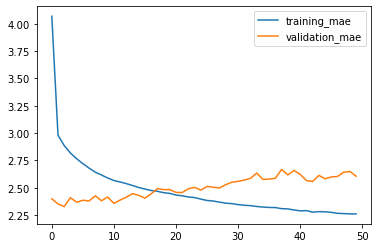

In [77]:
loss_df = pd.DataFrame({'training_mae': history.history['mae'],
                      'validation_mae':history.history['val_mae']})
loss_df.plot();

#### 7.3 Stacking RNNS

The description of the universal machine learning workflow: it’s generally a good idea to increase the capacity of your model until overfitting becomes the primary obstacle (assuming you’re already taking basic steps to mitigate overfitting, such as using dropout). 

Increasing network capacity is typically done by increasing the number of units in the layers or adding more layers. Recurrent layer stacking is a classic way to build more-powerful recurrent networks: for instance, not too long ago the Google Translate algorithm was powered by a stack of seven large LSTM layers—that’s huge.

To stack recurrent layers on top of each other in Keras, all intermediate layers should return their full sequence of outputs of shape (batch_size, timesteps, output_features) rather than their output at the last timestep (batch_size, output_features). This is done by specifying return_sequences=True.

You can see that the added layer does improve the results a bit <b>test MAE = 2.45</b>, though not dramatically. You may be seeing diminishing returns from
increasing network capacity at this point.

In [80]:
inputs = Input(shape=(sequence_length,raw.shape[-1]))
x = GRU(32,recurrent_dropout=0.5,return_sequences=True)(inputs)
x = GRU(32,recurrent_dropout=0.5)(x)
x = Dropout(0.5)(x) 

outputs = Dense(1)(x)
model = Model(inputs,outputs)

callbacks = [ModelCheckpoint('jena_stacked_gru_dropout.keras',save_best_only=True)]

model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history = model.fit(train,epochs=50,validation_data=val,callbacks=callbacks)

model = keras.models.load_model('jena_stacked_gru_dropout.keras')

print(f"Test MAE: {model.evaluate(test)[1]:.2f}")

Epoch 1/50
819/819 [==============================] - 355s 429ms/step - loss: 26.6974 - mae: 3.8001 - val_loss: 9.3470 - val_mae: 2.3689
Epoch 2/50
819/819 [==============================] - 362s 442ms/step - loss: 13.9623 - mae: 2.8951 - val_loss: 9.0159 - val_mae: 2.3302
Epoch 3/50
819/819 [==============================] - 366s 447ms/step - loss: 13.2395 - mae: 2.8213 - val_loss: 8.6474 - val_mae: 2.2798
Epoch 4/50
819/819 [==============================] - 368s 449ms/step - loss: 12.7074 - mae: 2.7623 - val_loss: 9.4799 - val_mae: 2.3975
Epoch 5/50
819/819 [==============================] - 374s 456ms/step - loss: 12.2518 - mae: 2.7153 - val_loss: 9.0630 - val_mae: 2.3448
Epoch 6/50
819/819 [==============================] - 366s 446ms/step - loss: 11.7655 - mae: 2.6618 - val_loss: 8.7816 - val_mae: 2.3072
Epoch 7/50
819/819 [==============================] - 359s 438ms/step - loss: 11.3264 - mae: 2.6164 - val_loss: 8.6124 - val_mae: 2.2836
Epoch 8/50
819/819 [=====================

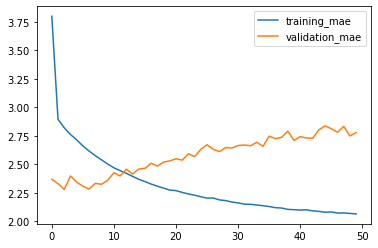

In [81]:
loss_df = pd.DataFrame({'training_mae': history.history['mae'],
                      'validation_mae':history.history['val_mae']})
loss_df.plot();

#### 7.4 Bidirectional RNNs

Bidirectional(), frequently used in natural language processing, not timeseries forecasting. 

A bidirectional RNN exploits the order sensitivity of RNNs: it uses two regular RNNs, each of which processes the input sequence in one direction (chronologically and antichronologically), and then merges their representations. By processing a sequence
both ways, a bidirectional RNN can catch patterns that may be overlooked by a unidirectional RNN.

However, antichronological RNNs strongly underperform in the case of temperature prediction. This makes perfect sense: the underlying LSTM layer will typically be better at remembering the recent past than the distant past, and naturally the more recent weather data points are more predictive than older data points.

#### 7.5 Better improve the model
- Adjust the number of units in each recurrent layer in the stacked setup, as well as the amount of dropout. The current choices are largely arbitrary and thus probably suboptimal.

- Adjust the learning rate used by the RMSprop optimizer, or try a different optimizer.

- Try using a stack of Dense layers as the regressor on top of the recurrent layer, instead of a single Dense layer.

- Improve the input to the model: try using longer or shorter sequences or a different sampling rate, or start doing feature engineering.

- Incorporate other locations weather data? how?<br>
    while near-future weather is highly predictable if you have access to data from a wide grid of different locations, it’s not very predictable if you only have measurements from a single location. The evolution of the weather where you are depends on current weather patterns in surrounding locations.

In [92]:
class NaiveDense:
    def __init__(self,input_size,output_size,activation):
        self.activation = activation
        
        w_shape = (input_size,output_size)
        w_initial_value = tf.random.uniform(w_shape,minval=0,maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
    def __call__(self,inputs):
        return self.activation(tf.matmul(inputs,self.W)+self.b)
    
    @property
    def weights(self):
        return [self.W,self.b]

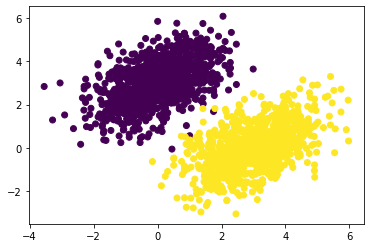

In [9]:
#Linear Regression from Scratch with Tensorflow
#1/ generating 2 classes of random points in a 2D plabe
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3],
                                                 cov=[[1, 0.5],[0.5, 1]],
                                                 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0],
                                                 cov=[[1, 0.5],[0.5, 1]],
                                                 size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
np.ones((num_samples_per_class, 1), dtype="float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]);

In [13]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

#forward pass
def model(inputs):
    return tf.matmul(inputs,W) + b

#MSE loss function
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)

#Training
learning_rate = 0.1
def training_step(inputs,targets):
    #forward pass while gradient taping
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions,targets)
    #retrieve the gradient of the loss with regard to the weights    
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W,b])
    #update the weights
    W.assign_sub(grad_loss_wrt_W*learning_rate)
    b.assign_sub(grad_loss_wrt_b*learning_rate)
    return loss
    
#batch training loop
for step in range(40):
    loss = training_step(inputs,targets)
    print("Loss at step {}: {}".format(step,loss))

Loss at step 0: 4.692168712615967
Loss at step 1: 0.6453100442886353
Loss at step 2: 0.2054225653409958
Loss at step 3: 0.14118488132953644
Loss at step 4: 0.12507353723049164
Loss at step 5: 0.11571990698575974
Loss at step 6: 0.10784704238176346
Loss at step 7: 0.10073544085025787
Loss at step 8: 0.09424500912427902
Loss at step 9: 0.0883130207657814
Loss at step 10: 0.08289032429456711
Loss at step 11: 0.07793310284614563
Loss at step 12: 0.0734013244509697
Loss at step 13: 0.06925851106643677
Loss at step 14: 0.06547129899263382
Loss at step 15: 0.062009140849113464
Loss at step 16: 0.058844130486249924
Loss at step 17: 0.055950772017240524
Loss at step 18: 0.05330574885010719
Loss at step 19: 0.05088775232434273
Loss at step 20: 0.048677291721105576
Loss at step 21: 0.046656545251607895
Loss at step 22: 0.0448092482984066
Loss at step 23: 0.04312051087617874
Loss at step 24: 0.04157669469714165
Loss at step 25: 0.04016539454460144
Loss at step 26: 0.03887522965669632
Loss at step 

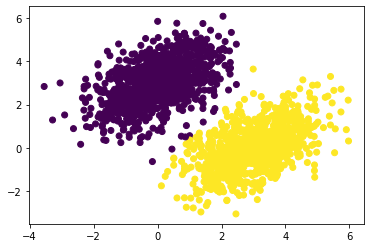

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5);